# Prediction Using Multiple Linear Regression

# Concept Session

## Demo 3.1 : Multiple Linear Regression 

### Importing the required Python packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [7]:
weather_df=pd.read_csv('DS1_C9_S3_Concept_BASEL_Weather_Data.csv')
weather_df

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0
...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6


### Understanding Data

In [9]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              3654 non-null   int64  
 1   MONTH             3654 non-null   int64  
 2   cloud_cover       3654 non-null   int64  
 3   humidity          3654 non-null   float64
 4   pressure          3654 non-null   float64
 5   global_radiation  3654 non-null   float64
 6   precipitation     3654 non-null   float64
 7   sunshine          3654 non-null   float64
 8   temperature       3654 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 257.1 KB


In [10]:
weather_df.isnull().sum()

DATE                0
MONTH               0
cloud_cover         0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temperature         0
dtype: int64

In [11]:
new=pd.read_csv('DS1_C9_S3_Concept_New_Data.csv')
new

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,20240426,4,9,0.77,1.007,0.1,0.08,4.2,9


### Variables

Dependent Variable: temperature

Independent Variables: humidity, pressure, cloud_cover, global_radiation, precipitation, sunshine

### Performing data preparation

In [15]:
# removing first two columns from the data
weather_df=weather_df.drop(['DATE','MONTH'],axis=1)
weather_df

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,8,0.89,1.0286,0.20,0.03,0.0,2.9
1,8,0.87,1.0318,0.25,0.00,0.0,3.6
2,5,0.81,1.0314,0.50,0.00,3.7,2.2
3,7,0.79,1.0262,0.63,0.35,6.9,3.9
4,5,0.90,1.0246,0.51,0.07,3.7,6.0
...,...,...,...,...,...,...,...
3649,7,0.82,1.0084,0.28,0.42,0.3,3.2
3650,7,0.92,1.0028,0.22,1.68,0.2,4.5
3651,8,0.92,0.9979,0.07,1.54,0.0,8.5
3652,7,0.93,0.9958,0.17,0.57,0.1,6.6


### 1. Missing Value Treatment

In [17]:
weather_df.isnull().sum()

cloud_cover         0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temperature         0
dtype: int64

### 2. Outlier Treatment

In [19]:
# Outlier Treatment
data=[]
for col in weather_df:
    lo=[]
    uo=[]
    column_df=pd.Series(weather_df[col])
    Max=max(column_df)
    Min=min(column_df)
    Range=Max-Min
    Q1=column_df.quantile(0.25)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in weather_df[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Max,Min,Range,Q1,Q3,IQR,UF,LF,[uo,lo]))
columns_names=["Columns","Max","Min","Range","Q1","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_names)
datas

,Columns,Max,Min,Range,Q1,Q3,IQR,UF,LF,Outliers
0,cloud_cover,8.0000,0.0000,8.0000,4.0000,7.0000,3.0000,11.5000,-0.5000,"[[], []]"
1,humidity,0.9800,0.3800,0.6000,0.6700,0.8300,0.1600,1.0700,0.4300,"[[], [0.38, 0.42, 0.4, 0.42, 0.42, 0.42, 0.43,..."
2,pressure,1.0408,0.9856,0.0552,1.0133,1.0227,0.0094,1.0368,0.9992,"[[1.0373, 1.0391, 1.0391, 1.0368, 1.0387, 1.03..."
3,global_radiation,3.5500,0.0500,3.5000,0.5300,2.0600,1.5300,4.3550,-1.7650,"[[], []]"
4,precipitation,7.5700,0.0000,7.5700,0.0000,0.2100,0.2100,0.5250,-0.3150,"[[0.65, 0.99, 1.27, 1.22, 0.9, 0.53, 0.56, 0.5..."
5,sunshine,15.3000,0.0000,15.3000,0.5000,8.0000,7.5000,19.2500,-10.7500,"[[], []]"
6,temperature,29.0000,-9.3000,38.3000,5.3000,16.9000,11.6000,34.3000,-12.1000,"[[], []]"


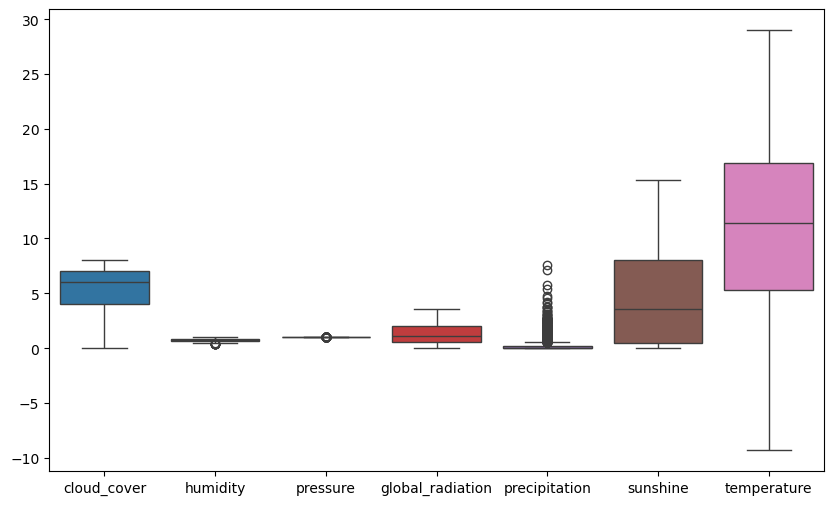

In [20]:
sns.boxplot(data=weather_df)
plt.gcf().set_size_inches(10,6)  #gcf-get current figure
plt.show()

In [21]:
def iqr_winsorisation(df,thresh=1.5):
    df_out=df.copy()
    col_to_treat=df_out.columns
    for col in col_to_treat:
        q1=df_out[col].quantile(0.25)
        q3=df_out[col].quantile(0.75)
        IQR = q3-q1
        low_f=q1-thresh*IQR
        upp_f=q3+thresh*IQR
        # winsoe=rize outliers
        df_out.loc[df_out[col]<low_f,col]=low_f
        df_out.loc[df_out[col]>upp_f,col]=upp_f
    return df_out

In [22]:
df = pd.DataFrame(weather_df)
#perform the ouliers treatement on all columns
weather_treated_df =  iqr_winsorisation(df.copy())
print(weather_treated_df)


# this code define the function that performs iqr based winsorization on a dataframe
# it identifies the outliers and replace the outiers with nearest fence value(lower or upper based on calculated iqr under specifeid threshold)

      cloud_cover  humidity  pressure  global_radiation  precipitation  \
0             8.0      0.89    1.0286              0.20          0.030   
1             8.0      0.87    1.0318              0.25          0.000   
2             5.0      0.81    1.0314              0.50          0.000   
3             7.0      0.79    1.0262              0.63          0.350   
4             5.0      0.90    1.0246              0.51          0.070   
...           ...       ...       ...               ...            ...   
3649          7.0      0.82    1.0084              0.28          0.420   
3650          7.0      0.92    1.0028              0.22          0.525   
3651          8.0      0.92    0.9992              0.07          0.525   
3652          7.0      0.93    0.9992              0.17          0.525   
3653          8.0      0.93    0.9992              0.08          0.525   

      sunshine  temperature  
0          0.0          2.9  
1          0.0          3.6  
2          3.7       

In [23]:
df = pd.DataFrame(weather_df)
#perform the ouliers treatement on all columns
weather_treated_df =  iqr_winsorisation(df.copy())
print(weather_treated_df)


# this code define the function that performs iqr based winsorization on a dataframe
# it identifies the outliers and replace the outiers with nearest fence value(lower or upper based on calculated iqr under specifeid threshold)

      cloud_cover  humidity  pressure  global_radiation  precipitation  \
0             8.0      0.89    1.0286              0.20          0.030   
1             8.0      0.87    1.0318              0.25          0.000   
2             5.0      0.81    1.0314              0.50          0.000   
3             7.0      0.79    1.0262              0.63          0.350   
4             5.0      0.90    1.0246              0.51          0.070   
...           ...       ...       ...               ...            ...   
3649          7.0      0.82    1.0084              0.28          0.420   
3650          7.0      0.92    1.0028              0.22          0.525   
3651          8.0      0.92    0.9992              0.07          0.525   
3652          7.0      0.93    0.9992              0.17          0.525   
3653          8.0      0.93    0.9992              0.08          0.525   

      sunshine  temperature  
0          0.0          2.9  
1          0.0          3.6  
2          3.7       

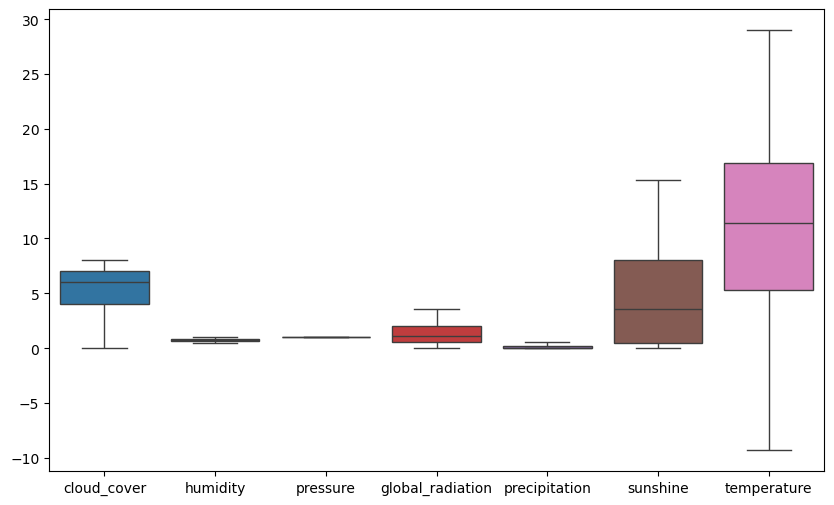

In [24]:
sns.boxplot(data=weather_treated_df)
plt.gcf().set_size_inches(10,6)  #gcf-get current figure
plt.show()

### 3. Data Scaling

In [26]:
# new data to predict using model
new_data=pd.read_csv('DS1_C9_S3_Concept_New_Data.csv')
new_data

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,20240426,4,9,0.77,1.007,0.1,0.08,4.2,9


In [27]:
new_data=new_data.drop(['DATE','MONTH'],axis=1)
new_data

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,9,0.77,1.007,0.1,0.08,4.2,9


In [28]:
# Append the new row to the original DataFrame
weather_treated_df=pd.concat([new_data,weather_treated_df],ignore_index=True)
weather_treated_df

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,9.0,0.77,1.0070,0.10,0.080,4.2,9.0
1,8.0,0.89,1.0286,0.20,0.030,0.0,2.9
2,8.0,0.87,1.0318,0.25,0.000,0.0,3.6
3,5.0,0.81,1.0314,0.50,0.000,3.7,2.2
4,7.0,0.79,1.0262,0.63,0.350,6.9,3.9
...,...,...,...,...,...,...,...
3650,7.0,0.82,1.0084,0.28,0.420,0.3,3.2
3651,7.0,0.92,1.0028,0.22,0.525,0.2,4.5
3652,8.0,0.92,0.9992,0.07,0.525,0.0,8.5
3653,7.0,0.93,0.9992,0.17,0.525,0.1,6.6


In [29]:
# Scaling data
cols = weather_treated_df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(weather_treated_df)

df_scaled = pd.DataFrame(df_scaled, columns = cols)
df_scaled

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,1.539625,0.230806,-1.409233,-1.315114,-0.252337,-0.106508,-0.272804
1,1.109631,1.346062,1.377856,-1.208198,-0.504881,-1.076724,-1.095705
2,1.109631,1.160186,1.790758,-1.154740,-0.656407,-1.076724,-1.001274
3,-0.180350,0.602558,1.739146,-0.887450,-0.656407,-0.222010,-1.190136
4,0.679637,0.416682,1.068180,-0.748459,1.111401,0.517202,-0.960803
...,...,...,...,...,...,...,...
3650,0.679637,0.695496,-1.228589,-1.122665,1.464963,-1.007423,-1.055235
3651,0.679637,1.624876,-1.951167,-1.186815,1.995305,-1.030523,-0.879862
3652,1.109631,1.624876,-2.415682,-1.347189,1.995305,-1.076724,-0.340255
3653,0.679637,1.717814,-2.415682,-1.240273,1.995305,-1.053624,-0.596569


### Extract out the new data from the origial data after scalling, which will be used for prediction

In [31]:
# Extract the last row index
last_row_index=len(df_scaled)-1


# Extract the last row using iloc and store in a new DataFrame
new_data=df_scaled.iloc[last_row_index]
new_data
# Reshape the extracted Series into a DataFrame (optional)


cloud_cover         1.109631
humidity            1.717814
pressure           -2.415682
global_radiation   -1.336497
precipitation       1.995305
sunshine           -1.076724
temperature        -1.095705
Name: 3654, dtype: float64

In [32]:
#Extract original data except the new data
# Reshape the extracted Series into a DataFrame (optional)
new_data_df = new_data.to_frame().transpose()
new_data_df

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
3654,1.109631,1.717814,-2.415682,-1.336497,1.995305,-1.076724,-1.095705


In [33]:
df_scaled=df_scaled.iloc[:-1]
df_scaled

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,1.539625,0.230806,-1.409233,-1.315114,-0.252337,-0.106508,-0.272804
1,1.109631,1.346062,1.377856,-1.208198,-0.504881,-1.076724,-1.095705
2,1.109631,1.160186,1.790758,-1.154740,-0.656407,-1.076724,-1.001274
3,-0.180350,0.602558,1.739146,-0.887450,-0.656407,-0.222010,-1.190136
4,0.679637,0.416682,1.068180,-0.748459,1.111401,0.517202,-0.960803
...,...,...,...,...,...,...,...
3649,0.679637,0.509620,-0.789880,-1.026441,0.252751,-0.545415,-1.352019
3650,0.679637,0.695496,-1.228589,-1.122665,1.464963,-1.007423,-1.055235
3651,0.679637,1.624876,-1.951167,-1.186815,1.995305,-1.030523,-0.879862
3652,1.109631,1.624876,-2.415682,-1.347189,1.995305,-1.076724,-0.340255


### 4. Feature Selection through Multicolinearity checking

### Checking multicollinearity using heatmap and by removing features (independent variables) that are highly correlated with each other.

### Which value should represent high multicollinearity? 

In data science industry (depending on business strategy), the mostly used cutoff value ranges from 0.7 to 0.8.   
For example, if the cutoff value is 0.7 which means if two features have a correlation value of 0.7 or above, one of the features will be ignored.

The next question is, which feature should be ignored or selected out of the two highly correlated features?   
Answer: The feature that has high correlation with the dependent variable should be selected.   


In [36]:
# Selecting the cutoff value as 0.7
abs(df_scaled.corr())>=0.7

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
cloud_cover,True,False,False,False,False,True,False
humidity,False,True,False,False,False,False,False
pressure,False,False,True,False,False,False,False
global_radiation,False,False,False,True,False,True,True
precipitation,False,False,False,False,True,False,False
sunshine,True,False,False,True,False,True,False
temperature,False,False,False,True,False,False,True


<Axes: >

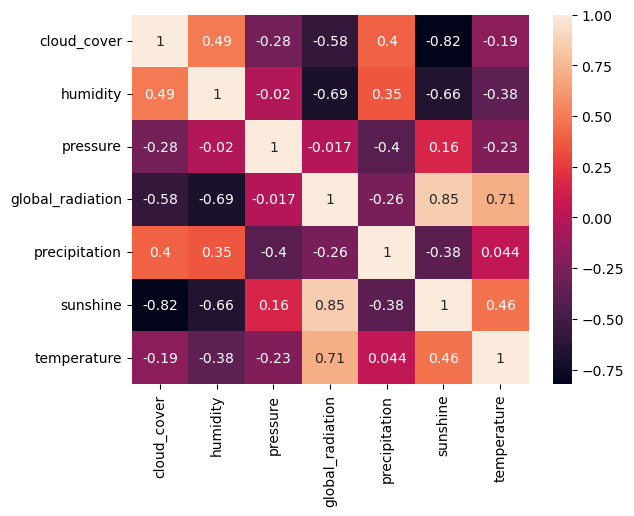

In [37]:
sns.heatmap(df_scaled.corr(),annot=True)

#### Checking multicollinearity for the given dataset 

In [39]:
# Plotting heatmap
# correlation absolute value of global radiation with sunshine variable to eachother are high greater than 0.70 and cloud cover correlation value with the sunshine is also greater than 0.7 , so dropping sunshine variable


Interpretation: 

### Dropping this variable and selecting the rest of the variables to build models.

In [42]:
df_scaled_selected=df_scaled.drop('sunshine',axis=1)
df_scaled_selected

,cloud_cover,humidity,pressure,global_radiation,precipitation,temperature
0,1.539625,0.230806,-1.409233,-1.315114,-0.252337,-0.272804
1,1.109631,1.346062,1.377856,-1.208198,-0.504881,-1.095705
2,1.109631,1.160186,1.790758,-1.154740,-0.656407,-1.001274
3,-0.180350,0.602558,1.739146,-0.887450,-0.656407,-1.190136
4,0.679637,0.416682,1.068180,-0.748459,1.111401,-0.960803
...,...,...,...,...,...,...
3649,0.679637,0.509620,-0.789880,-1.026441,0.252751,-1.352019
3650,0.679637,0.695496,-1.228589,-1.122665,1.464963,-1.055235
3651,0.679637,1.624876,-1.951167,-1.186815,1.995305,-0.879862
3652,1.109631,1.624876,-2.415682,-1.347189,1.995305,-0.340255


## Demo 3.2 : Multiple Linear Regression 

In [44]:
# To show the correlation values from most negatively correlated to the most positively correlated.
sorted_corr=df_scaled_selected.corr()[['temperature']].sort_values('temperature',ascending=False)
sorted_corr

,temperature
temperature,1.000000
global_radiation,0.708199
precipitation,0.043665
cloud_cover,-0.187047
pressure,-0.229251
humidity,-0.376294


## 1.  One feature: 'global_radiation' 
### It has the highest correlation value with the dependent variable.
#### Data Splitting, training, and predicting the model


In [46]:
X1=np.array(df_scaled_selected['global_radiation']).reshape(-1,1)

y=np.array(df_scaled_selected['temperature'])

In [87]:
X_train1, X_test, y_train1, y_test1 = train_test_split(X1,y, test_size = 0.3, random_state = 200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1,y_train1)
y_pred1 = s_model1.predict(X_test)
y_pred1
# print('intercept:',s_model1.intercept_)
# print('slope:',s_model1.coef_)

array([-0.75479651,  1.42548868, -0.06386106, ...,  0.17412781,
        0.21251311, -0.45539115])

#### Evaluating the model performance

In [49]:
# Calculating MSE, MAE, RMSE, R-Square
MSE1= mean_squared_error(y_test1,y_pred1)
print('MSE:',MSE1)
MAE1= mean_absolute_error(y_test1,y_pred1)
print('MAE:',MAE1)
RMSE1= mean_squared_error(y_test1,y_pred1,squared=False)
print('RMSE:',RMSE1)
R2_1 = r2_score(y_test1,y_pred1)
print('R2:',R2_1)

MSE: 0.5010679782623538
MAE: 0.5815758242046911
RMSE: 0.7078615530330447
R2: 0.4988459098481737


## 2. Two features: 'global_radiation' and 'humidity'

In [51]:
# Two features

X2=np.array(df_scaled_selected[['global_radiation','humidity']]).reshape(-1,2)

y=np.array(df_scaled_selected['temperature'])

#### Splitting data and training model

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size = 0.3, random_state = 200)
mult_model = LinearRegression().fit(X_train2, y_train2)
y_pred2=mult_model.predict(X_test2)
print('y_pred2',y_pred2)

print(mult_model.intercept_)
print(mult_model.coef_)

y_pred2 [-0.89223987  1.36001068  0.02251962 ...  0.26770263  0.05039558
 -0.32996006]
0.010791095909078117
[0.85307135 0.20206305]


#### Evaluating the model performance

In [55]:

MSE2= mean_squared_error(y_test2,y_pred2)
print('MSE:',MSE2)
MAE2= mean_absolute_error(y_test2,y_pred2)
print('MAE:',MAE2)
RMSE2= mean_squared_error(y_test2,y_pred2,squared=False)
print('RMSE:',RMSE2)
R2_2 = r2_score(y_test2,y_pred2)
print('R2:',R2_2)


MSE: 0.4731224543407359
MAE: 0.5593656720951091
RMSE: 0.687838974136197
R2: 0.5267962363953265


### Interpretation:
by adding the humidity feature R2 has been increased which means the model is improving

## 3. Three features: 'global_radiation', 'humidity', and 'pressure'

In [58]:
# Three features
X3=np.array(df_scaled_selected[['global_radiation','humidity','pressure']]).reshape(-1,3)
y=np.array(df_scaled_selected['temperature'])


#### Splitting data and training model

In [60]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y,test_size = 0.3, random_state = 200)
mult_model_2= LinearRegression().fit(X_train3, y_train3)
y_pred3=mult_model_2.predict(X_test3)
print('y_pred3',y_pred3)

print(mult_model_2.intercept_)
print(mult_model_2.coef_)

y_pred3 [-0.51381582  1.12184197  0.1300673  ...  0.35204918  0.02858611
 -0.25945366]
0.00979591356353422
[ 0.84548811  0.19327065 -0.21624531]


#### Evaluating the model performance

In [62]:

MSE3= mean_squared_error(y_test3,y_pred3)
print('MSE3:',MSE3)
MAE3= mean_absolute_error(y_test3,y_pred3)
print('MAE3:',MAE3)
RMSE3= mean_squared_error(y_test3,y_pred3,squared=False)
print('RMSE3:',RMSE3)
R2_3 = r2_score(y_test3,y_pred3)
print('R2_3:',R2_3)


MSE3: 0.4331016769957153
MAE3: 0.5252331888319391
RMSE3: 0.6581046094624435
R2_3: 0.5668238915790933


### Interpretation:


### 4. Four features: 'global_radiation', 'humidity', 'pressure', and 'cloud_cover'

In [65]:
# Three features

X4=np.array(df_scaled_selected[['global_radiation','humidity','pressure','cloud_cover']]).reshape(-1,4)
y=np.array(df_scaled_selected['temperature'])


In [66]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y,test_size = 0.3, random_state = 200)
mult_model_3= LinearRegression().fit(X_train4, y_train4)
y_pred4=mult_model_3.predict(X_test4)
print('y_pred3',y_pred4)

print(mult_model_3.intercept_)
print(mult_model_3.coef_)

y_pred3 [-0.4921757   1.23532906 -0.20611371 ...  0.50149278 -0.15428475
 -0.13169002]
0.005648988986832488
[ 0.96365224  0.15213182 -0.14392938  0.25078784]


In [67]:

MSE4= mean_squared_error(y_test4,y_pred4)
print('MSE3:',MSE4)
MAE4= mean_absolute_error(y_test4,y_pred4)
print('MAE3:',MAE4)
RMSE4= mean_squared_error(y_test4,y_pred4,squared=False)
print('RMSE3:',RMSE4)
R2_4 = r2_score(y_test4,y_pred4)
print('R2_3:',R2_4)


MSE3: 0.39614875853678055
MAE3: 0.5033102922283074
RMSE3: 0.6294034942203456
R2_3: 0.6037831606446684


### Interpretation


### Assumption to check model's homoscedasticity

In [71]:
def calculate_residuals(model,feature,label):
    prediction=model.predict(feature)
    df_result=pd.DataFrame({'actual':label,'predicted':prediction})
    df_result['residual']=abs(df_result['actual'])-abs(df_result['predicted'])
    return df_result

In [72]:
def homoscedasticity(model,feature,label):
    df_result=calculate_residuals(model,feature,label)
    plt.subplots(figsize=(12,10))
    ax=plt.subplot(111) #to remove spines
    plt.scatter(x=df_result.index,y=df_result.residual,color="green",alpha=0.5) 
    plt.plot(np.repeat(0,df_result.index.max()),color="brown",linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.show()

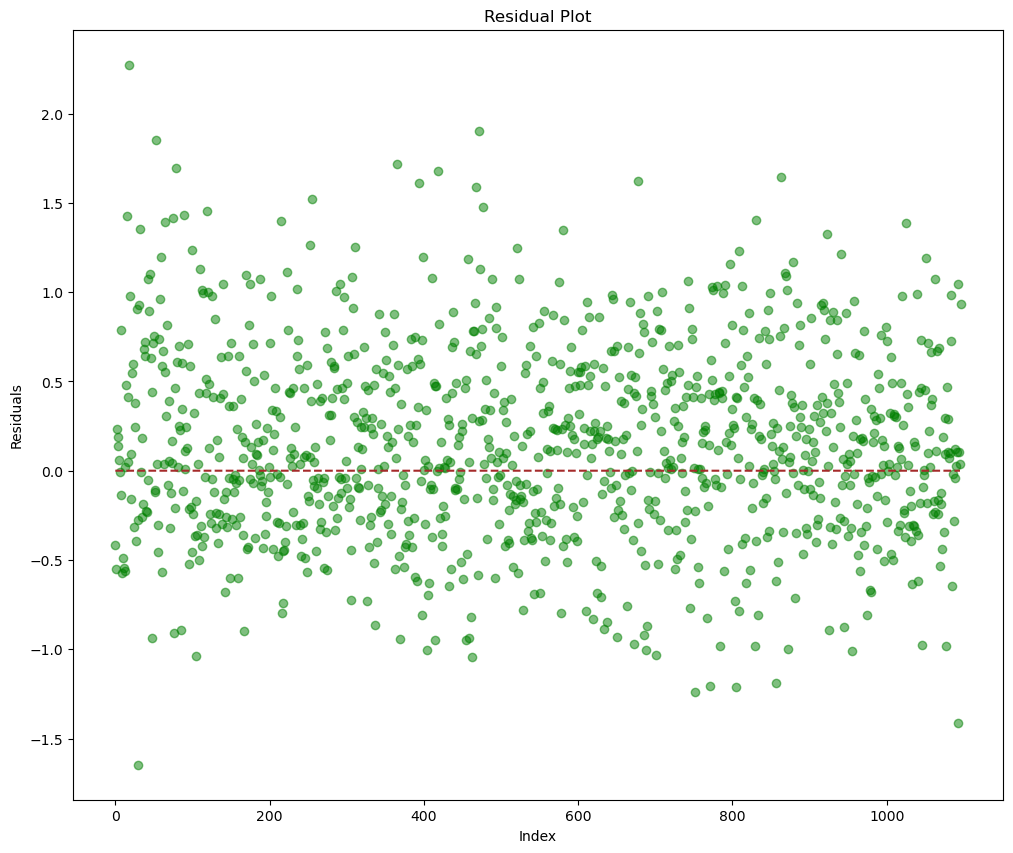

In [73]:
homoscedasticity(mult_model_3,X_test4,y_test4)

# Interpretation: 
we observe a fairly even spread of residuals both above and below the zero line across all indices so there is some evidence of homoscedasticity

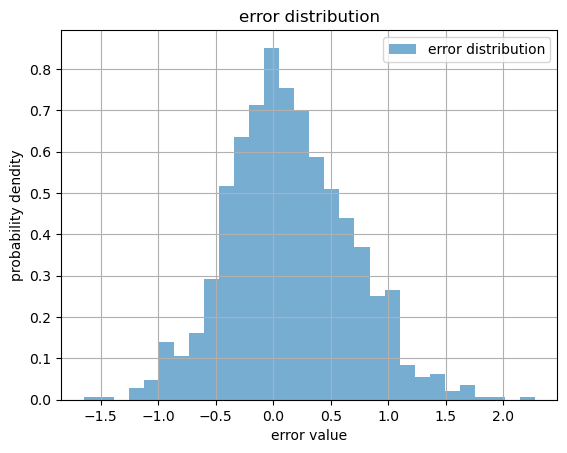

In [75]:
# Code to Error Normality curve
df_result=calculate_residuals(mult_model_3,X_test4,y_test4)
plt.hist(df_result.residual,bins=30,label='error distribution',alpha=0.6,density=True)
plt.xlabel('error value')
plt.ylabel('probability dendity')
plt.title('error distribution')
plt.grid(True)
plt.legend()
plt.show()

# Interpretation: 
so error distribution curve show normality in nature

### Predicting new data

In [78]:
# Reshape the new data into a 2D array for prediction
new_data_array=np.reshape(new_data[['global_radiation','humidity','pressure','cloud_cover']],(1,-1))
new_data_array

array([[-1.33649694,  1.71781357, -2.41568241,  1.10963081]])

In [79]:
# Predict the target value for the new data
predicted_value=mult_model_3.predict(new_data_array)
predicted_value
# Print the predicted value


array([-0.39496559])

In [80]:
# Original value of the new data


### Interpretation:



In [82]:
new_data.to_frame().transpose()

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
3654,1.109631,1.717814,-2.415682,-1.336497,1.995305,-1.076724,-1.095705


# moderate error with imporvemnet over single variable :
 MSE=0.396 this value indicates lower error comapre to previous model you have shared assumping 0.5.
 a lower MSE suggest a model makes prediction tat are closes to the actual temperatur on avg.

 MAE=0.50 similar to mse this lower then a potential prevous mae  indicating reduction in the avg abs value b/w predicted and actual temp

 RMSE=0.629 it is lower than the possible prvious value of 0.70 signifiying decrease in the avg magnitude of the errors in the temperature


# IMPOROVED CORRELATION
r2_score=0.60 this value is higher than the potential prevoius r2_score of 0.49 suggesting a significant improvement and R2_score of 0.60 indicates that the model explained around 60% of variablity in temperature based on global radiation ,humidity,pressure and clod cover.
this represents a stonger coreelation b/w these combined factors and temperature comapred using gobal radition alone

# OVERALL Interpretation
this multiple linear regression model shows better performance model comapared to potential single varibale model using only global radition
the errors (MSE,MAE,RMSE) have decreased indicating the more acurate prediction on a average .
the r2_score value have increased significantly suggesting that the             cloudcover together explain a large portion together

 in conclusion this multiple linear reg model demontste the clear improvement prediction  in temparture         captured large portion of the influence factors comapred to a potential singl variable 



In [86]:
y=0.0056+0.96*x1+1.5*x2-0.14*x3+0.25*x4

NameError: name 'x1' is not defined

In [ ]:
# .values->this extract the values from selected column as numpy array 
# -reshaape(-1,2) this reshape the  array into the format whwere each row represnt the data points with two values globalradition and humidity.
# the -1 tells numpy to figure out the based on the number of row based on number of elements in the array

In [ ]:
# visualize the data

X_2=df_scaled_selected[['global_radiation','humidity']].values.reshape(-1,2)  
Y=df_scaled_selected['temperature']
x=X_2[:,0] #this extracts the first column
y=X_2[:,1]
z=Y

fig=plt.figure(figsize=(16,12))
ax=plt.axes(projection='3d')
# ax.grid(b=True)

ax.scatter3D(x,y,z)
ax.set_xlabel('global_radiation',fontweight='bold')
ax.set_ylabel('humidity',fontweight='bold')
ax.set_zlabel('temperature',fontweight='bold')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
X_2=df_scaled_selected[['global_radiation','humidity']].values.reshape(-1,2)  
Y=df_scaled_selected['temperature']
x=X_2[:,0] #this extracts the first column
y=X_2[:,1]
z=Y

x1_line=np.arange(min(x),max(x),0.1) #creates an array of evently spaces values b/w the min and max value of x(global radition) with size of step size 0.1
                                    #this is used to plot regression line
x2_line=np.array([mult_model_3.coef_[0]*val+(mult_model_3.intercept_+mult_model_3.coef_[1]*np.mean(y))for val in x1_line])
y_line=mult_model_3.coef_[0]*x1_line+mult_model_3.coef_[1]*x2_line+mult_model_3.intercept_
# taking the amt of gr(x1_line) and * by how much gr affect the temperature
# we are adding by taking the amount of humidity (x2_line) and  * by how much humidity affect the temperature
# adding the base temperature

fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
# ax.grid(b=True)

ax.scatter3D(x,y,z,label='datapoints',c='orange')
# plot regression line
ax.plot(x1_line,x2_line,y_line,label='Regression line',c='b')
# set label and title 
ax.set_xlabel('global_radiation',fontweight='bold')
ax.set_ylabel('humidity',fontweight='bold')
ax.set_zlabel('temperature',fontweight='bold')
ax.set_title("linear regression with 3D data")
ax.legend()
plt.show()

In [ ]:
# mult_model2.coef_[0] : this extracts the coeeficient of the first independent variable(gr) from the trained linear regression model(mult_model2)
# *val: this represents each individual value in the x1_line array which cntains the range of values of gr
# this extract the intercept from the trained model
# mult_model2.coef_[1] = this extracts the coeeficient of the first independent variable(humidity) from the trained linear regression model(mult_model2)
# np.mean(y): calculating the mean of the humidity value
#for loop: this line calculates the corresponding x2 line values based on the following 
#it iterates through each val in the x1_line array 
#for each val, it calculates the value for x2_line using the equation 
#x2_line _value = (coeff of gr * val)+(intercept term + coeff of humidity * mean of humidity)
#this calculation determines the relationship b/w gr(x1_line) and humidity (x2_line) based on the trained linear regression model
#y_line: this calculates the predicted value y(temp) for the regression line based on the calculated x1_line and x2_line